*Generate publication quality histogram plots using the mosaicscripts.plot.histogram module.*

	:Created:	12/14/2015
	:Author: 	Arvind Balijepalli <arvind.balijepalli@nist.gov>
	:License:	See LICENSE.TXT
	:ChangeLog:
        01/09/16         AB    Added a plot overlay example.
        12/14/15	 	AB	Initial version

In [1]:
import numpy as np
from scipy.optimize import curve_fit

In [2]:
import mosaicscripts.plots.histogram as histogram
from mosaic.utilities.sqlQuery import query

In [3]:
q="select BlockDepth from metadata where ProcessingStatus='normal' and ResTime > 0.25 and BlockDepth between 0.3 and 0.4"

#### Basic Histogram Plots

Plots are generated using the ```mosaicscripts.plots.histogram.histogram_plot()``` function. See the [histogram module](../mosaicscripts/plots/histogram.py) for additional details.

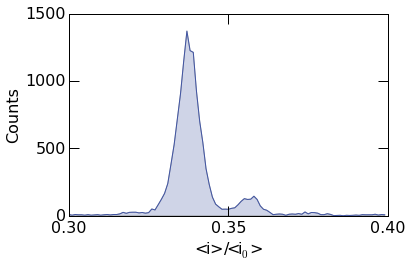

In [12]:
histogram.histogram_plot(
				query("../data/eventMD-P28-bin.sqlite", q),
				100, 
				(0.3, 0.4), 
				xticks=	(0.3,0.35,0.4),
				yticks=(0,500,1000,1500),
				xlabel=r"<i>/<i$_0$>",
				ylabel=r"Counts"
			)

To plot the probability density, supply the argument `density`=True as shown below.

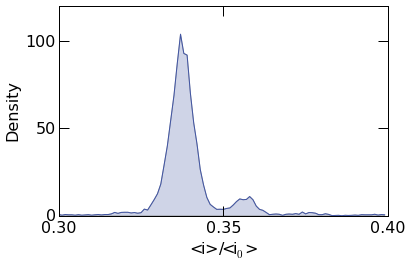

In [5]:
histogram.histogram_plot(
				query("../data/eventMD-P28-bin.sqlite", q),
				100, 
				(0.3, 0.4), 
				xticks=	(0.3,0.35,0.4),
				yticks=(0,50,100),
				xlabel=r"<i>/<i$_0$>",
				ylabel=r"Density",
                density=True
			)

#### Custom Styles

The fill transperancy can be controlled with the `fill_alpha` argument. When set to `1`, it results in a filled plot as seen below. To turn off filling, simply set `fill_alpha`=0

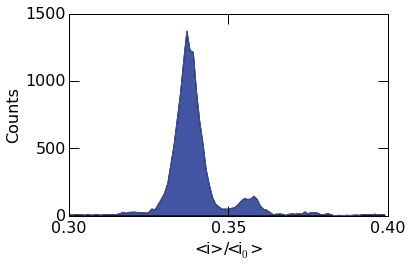

In [6]:
histogram.histogram_plot(
				query("../data/eventMD-P28-bin.sqlite", q),
				100, 
				(0.3, 0.4), 
				xticks=	(0.3,0.35,0.4),
				yticks=(0,500,1000,1500),
				xlabel=r"<i>/<i$_0$>",
				ylabel=r"Counts",
                fill_alpha=1
			)

Matplotlib plotting directies can be supplied to `histogram_plot()` using the `advanced_opts` argument. See the [Matplotlib plot documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for additional details. In the example below, the plot linewidth is set to 1.5 points.

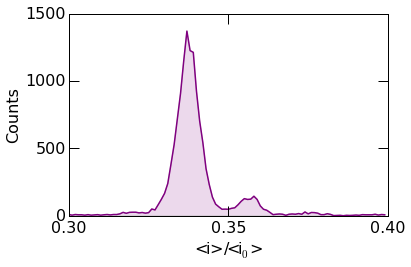

In [7]:
histogram.histogram_plot(
				query("../data/eventMD-P28-bin.sqlite", q),
				100, 
				(0.3, 0.4), 
				xticks=	(0.3,0.35,0.4),
				yticks=(0,500,1000,1500),
				xlabel=r"<i>/<i$_0$>",
				ylabel=r"Counts",
                color='purple',
                dpi=600,
                fill_alpha=0.15,
                advanced_opts={'linewidth': 1.5}
			)

The example below shows more advanced styling. Circular markers can be placed at the center of each bin using the [Matplotlib marker keywords](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot).

Finally, images can be saved by supplying the `figname` argument as seen in the example below. Optionally, the figure resolution can be set with the `dpi` argument.

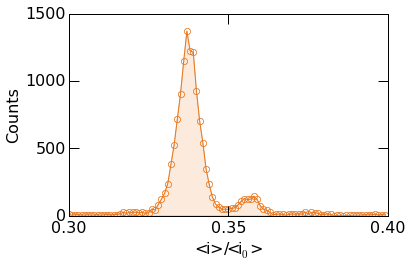

In [8]:
histogram.histogram_plot(
				query("../data/eventMD-P28-bin.sqlite", q),
				100, 
				(0.3, 0.4), 
				xticks=	(0.3,0.35,0.4),
				yticks=(0,500,1000,1500),
				figname="histogram.png",
				xlabel=r"<i>/<i$_0$>",
				ylabel=r"Counts",
                color='#EB771A',
                dpi=600,
                fill_alpha=0.15,
                advanced_opts={
                            'marker': 'o',
                            'markersize': 6, 
                            'markeredgecolor' : '#EB771A', 
                            'markeredgewidth' : 0.75,
                            'markerfacecolor': 'none', 
                            'linewidth': 1.
                        }
			)

#### Advanced Analysis and Plot Overlays

The ```mosaicscripts.plots.histogram.histogram_plot()``` function allows one to overlay additional curves on top of the histogram data. This is useful, for example, to fit the histogram to a known functional form. Below we describe, how to fit the histogram data to a sum of two Gaussians.

First we must define the fit function as shown below. We sum two Gaussians of the form: $a_1 exp(-(x-\mu_1)^2/2\sigma_1^2)+a_2 exp(-(x-\mu_2)^2/2\sigma_2^2)$, where $x$ is the independent variable, $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation,  $a$ is the amplitude and the subscripts denote the peak number.

In [9]:
def gauss_sum_fit(x, a1, mu1, sigma1, a2, mu2, sigma2):
    return a1*np.exp(-(x-mu1)**2/(2*sigma1**2)) + a2*np.exp(-(x-mu2)**2/(2*sigma2**2))

Next, we call the ```histogram_plot``` function as before. Note however there are two additional options we must provide to enable us to add the peak fits to the plot. The first is ```show=False```, which suppresses plotting the histogram to allow additional plots to be added to the figure (see the [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show) for details), and the second is ```return_histogram=True```, which returns the raw histogram data that we fit to.

Next, we perform the least squares fit using the [Scipy curve_fit](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.curve_fit.html) function. The optimized parameters and covariance are stored in ```popt``` and ```pcov``` respectively.

Finally, we plot the fit function and call [show()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show) to display the figure.

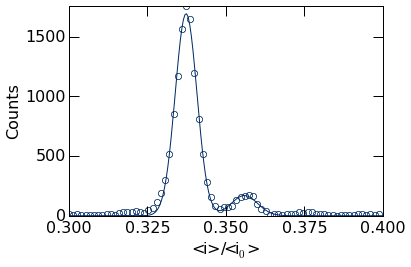

In [10]:
hist,bins=histogram.histogram_plot(
                            query("../data/eventMD-P28-bin.sqlite", q),
                            75, 
                            (0.3, 0.4), 
                            xticks=	(0.3,0.325,0.35,0.375,0.4),
                            yticks=(0,500,1000,1500),
                            figname="histogram.png",
                            xlabel=r"<i>/<i$_0$>",
                            ylabel=r"Counts",
                            fill_alpha=0.,
                            show=False,
                            return_histogram=True,
                            advanced_opts={
                                'marker': 'o',
                                'markersize': 6,
                                'markeredgecolor' : '#002A63',
                                'markeredgewidth' : 0.75,
                                'markerfacecolor': 'none',
                                'linewidth': 0.
                        }
        )

popt,pcov=curve_fit(gauss_sum_fit, bins, hist, [1200, 0.34,0.003, 100, 0.36,0.003])

xdat=np.arange(0.3, 0.4,0.0005)
ydat=gauss_sum_fit(xdat, *popt)

histogram.plt.plot(xdat, ydat, color="#002A63")
histogram.plt.show()

The ```popt``` variable holds the optimized fit parameters, stored in the order defined by the ```gauss_sum_fit```  above. We can extract these values from this list. For example, the peak positions can be retrieved as shown below.

In [11]:
popt[1], popt[4]

(0.33733498827022712, 0.3559240351776794)